### Data Loading

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1 = pd.read_csv(r"C:\Users\Kiran\OneDrive\Desktop\PRACTISE_PROJECT\bangaluru_house_price_preject_Dataset\bengaluru_house_prices.csv")

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df1["area_type"].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

### Data Cleaning

In [8]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
## drop "availability" feature as its not as such important for target
df1=df1.drop(["area_type","availability","society","balcony"],axis=1)
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [10]:
df1.shape

(13320, 5)

In [11]:
df1=df1.dropna()
df1.isnull().sum()


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df1.shape

(13246, 5)

In [13]:
## checking size data with unique
df1["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
## transformation of size into integer only
df1["bhk"]=df1["size"].apply(lambda x: int(x.split(" ")[0]) )
df1

C:\Users\Kiran\AppData\Local\Temp\ipykernel_23816\1324610775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["bhk"]=df1["size"].apply(lambda x: int(x.split(" ")[0]) )


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [15]:
df1["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [16]:
### checking home having grater than 20 bedroom

print(df1[df1.bhk>20])
#or
##print(df1[df1["bhk"]>20])

                       location        size total_sqft  bath  price  bhk
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0   43


##### Looks like 43 bedroom with 2400 total_sqft is something fishy so,lets looks total_sqft datatype

In [17]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

##### here, total_sqft showing at some place in the range like '1133 - 1384'.so,need to change it one format

In [18]:
### total_sqft is object need to change into float or int by using define function


def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
### checking type of data units in total_sqft feature
df1[~df1['total_sqft'].apply(is_float)].head(10)    ## Neggit(~) operation return DataFrame back to me

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


##### total_sqft feature shows in range format with non-uniformality like 34.46Sq. Meter,4125Perch,2100 - 2850 this create mess.so,need to handle it by uniformality approach.

In [20]:
### here you can unit conversion or else only tackel with range value like 2100 - 2850 by numeric conversion

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
### checking conversion
convert_sqft_to_num('2100 - 2850')

2475.0

In [22]:
## now creating copy of df1 into df2 for futher conversion
df2=df1.copy()

df2['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_num) 
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [23]:
### checking  conversion for 34.46Sq. Meter by index no. using loc function
df2.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

##### data likes 34.46Sq. Meter convert to NaN

### Feature Engineering

In [24]:
### In real-estate, price per sqft is very important so,taking total into new feature to detect outliers

df2['price_per_sqft'] = df2['price']*100000/df2['total_sqft']

df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
#### Lets explore Location feature and check how many location in catogory data

df2['location'].nunique()

1304

In [26]:
### here,we got 1304 location with too many feature(datapoints) which can be diamentionlity curse
## so,needed to reduce dimentionality need to clean extra space to check how many datapoints are there.

df2['location'] = df2['location'].apply(lambda x: x.strip())

In [27]:
### let's check datapoint(i.e text ,those location used for house selling) in location feature with counts

location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [28]:
### checking how many location has less than 10 datapoints(text inside address)

len(location_stats[location_stats<=10])   ## outof 1293 location length 1052 are less than 10 datapoints

1052

In [29]:
location_stats_less_than_10 =location_stats[location_stats<=10]
location_stats_less_than_10

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64

In [30]:
### now,transform this  location_stats<10 as other or general category

df2['location'] = df2['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x )

In [31]:
### lets check location text  count more than 10
df2['location'].nunique()

242

In [32]:
### Detection of Outliers in datasets (showing data error or anamolies)
### here,we keep 300 sqft as threshold value by considering minimum sqft where 1rk or 1bhk build
df2[df2.total_sqft/df2.bhk<300]   ## so, below 300 sqft is not standard

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [33]:
df2.shape

(13246, 7)

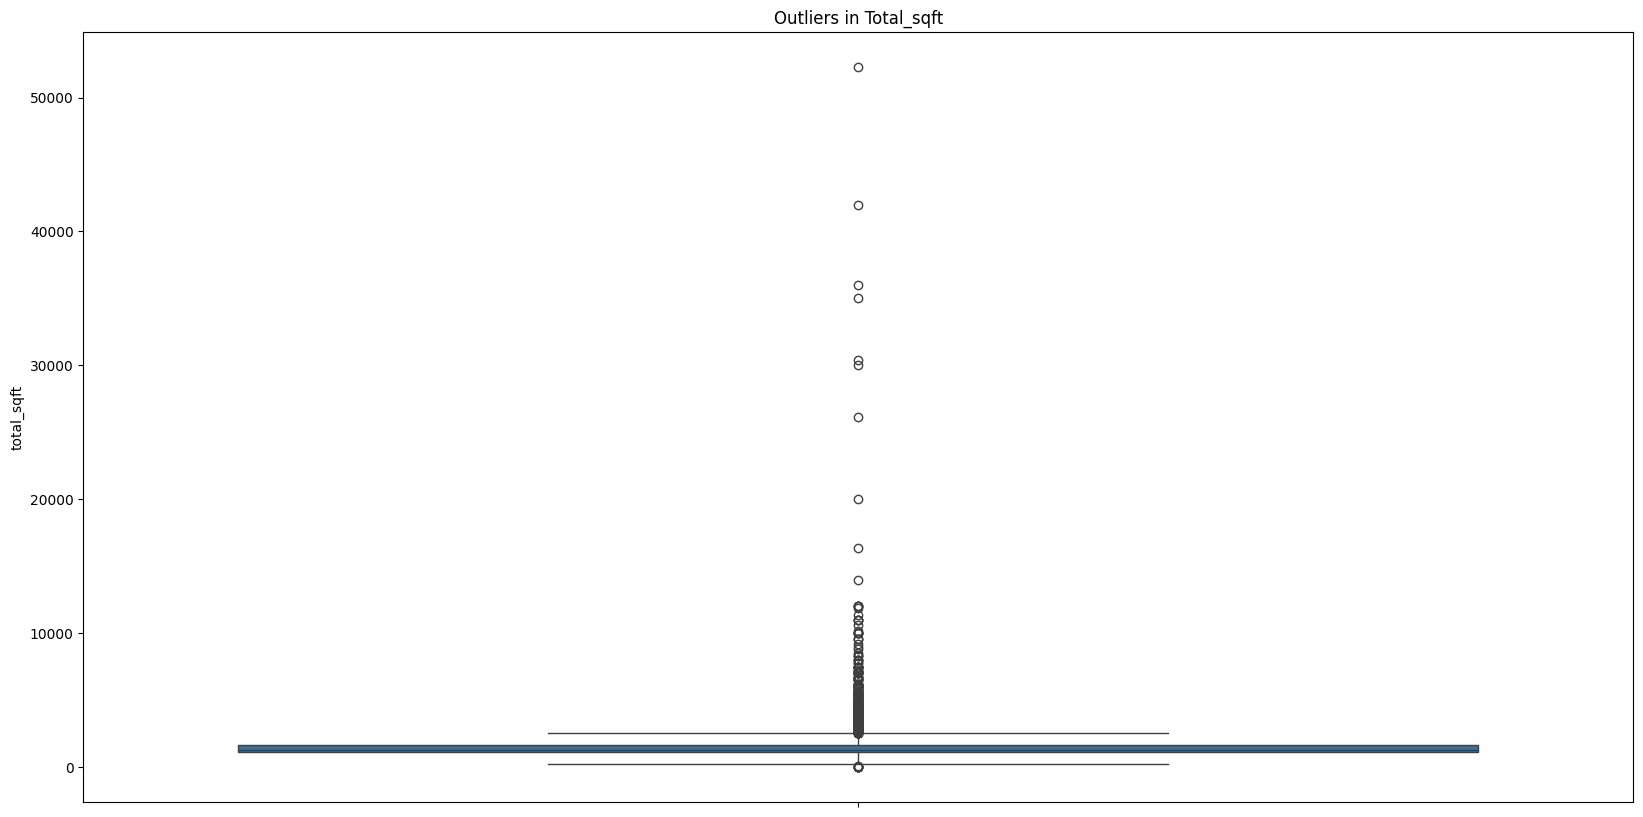

In [34]:
###
import seaborn as sns
sns.boxplot(df2['total_sqft'])
plt.title("Outliers in Total_sqft")
plt.show()

In [35]:
### remove outlier
df2 = df2[~(df2.total_sqft/df2.bhk<300)]    ## this neggit(~) works like drop
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [36]:
### checking stastical description of price per sqft
df2["price_per_sqft"].describe()


count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

##### here, we see for 1 sqft minimum price is 267/- and maximum 1,76,470/- is extremaly unlike property price.so,we are making generic model ,have to remove this extrim cases.

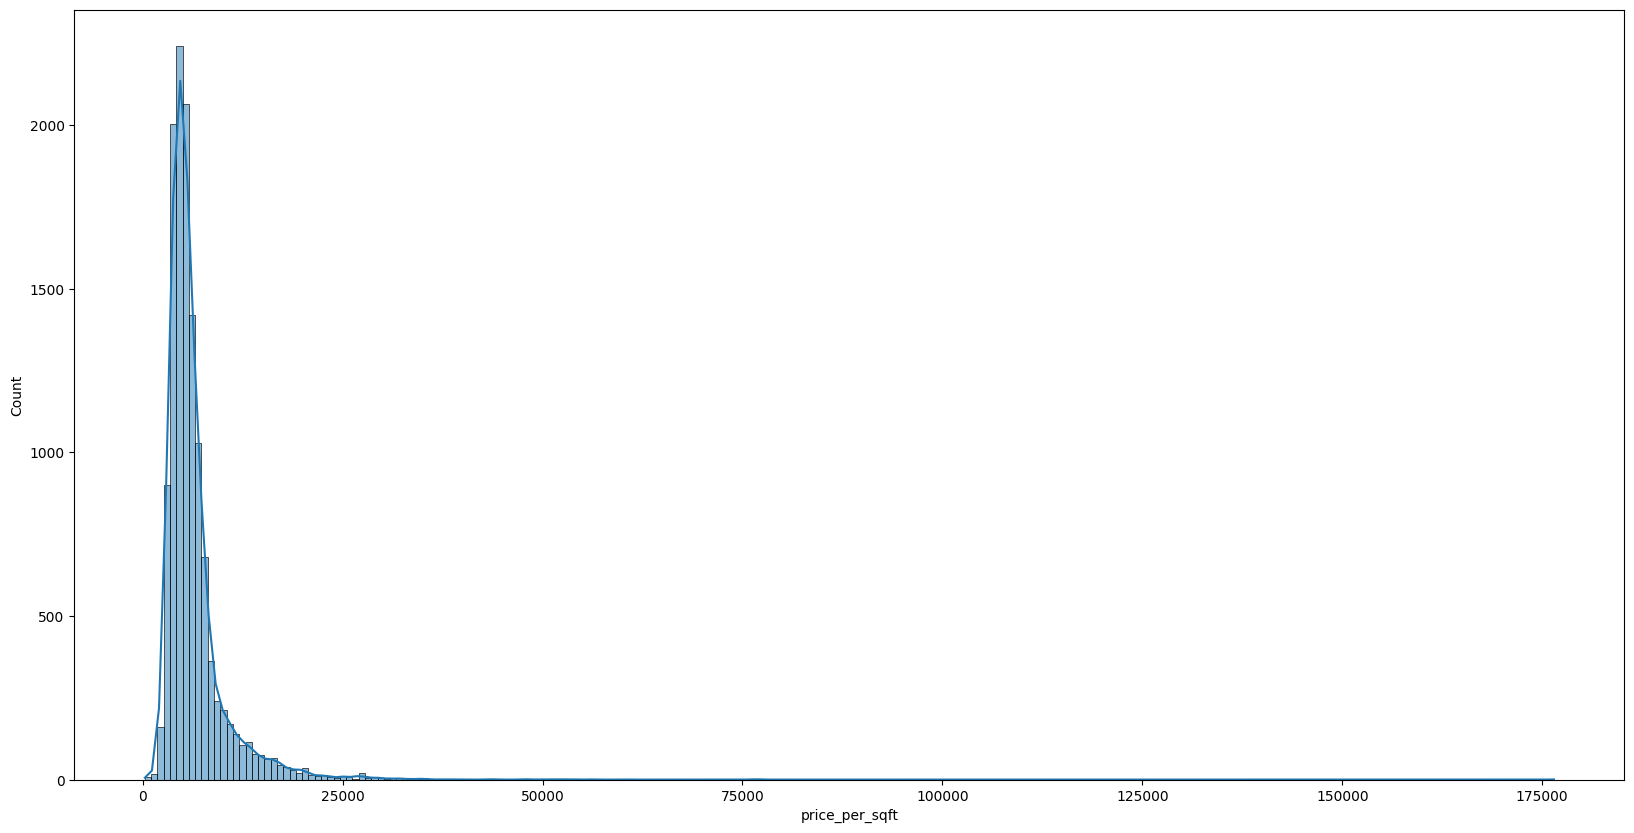

In [37]:
### checking normal distribution of datapoints 
import seaborn as sns
sns.histplot(df2['price_per_sqft'],kde=True)
plt.show()

##### Data is Right-Skewed and around 70% of data is within normal range

In [38]:
#### removing outlier per location
## 1st find mean & std.deviation of per location  
## and then remove other by keeping one threshold value  as std devation

### create empty dataframe to collect/store cleaned data
df_out = pd.DataFrame()

### group data by location
for location,sub_df in df2.groupby('location'):

    ### mean & standard devation of price_per_sqft for that location
    mean_price = sub_df['price_per_sqft'].mean()
    std_price = sub_df['price_per_sqft'].std()

    ### filter row within (mean-std) and (mean+std)
    filtered_df = sub_df[
        (sub_df['price_per_sqft']>(mean_price - std_price))&
        (sub_df['price_per_sqft']<(mean_price + std_price))
        ]

    ### append filtered data
    df_out = pd.concat([df_out,filtered_df],ignore_index=True)

### final cleaned dataframe and store into df3
df3=df_out

### check shape
df3.shape      ### 10291 is  no. of rows after removing outlier per location (price_per_sqft)

(10291, 7)

Here, we removed datapoints that are not in range of less than (mean_price - std_price) and greater than (mean_price + std_price) of each location as outliers in dataset.

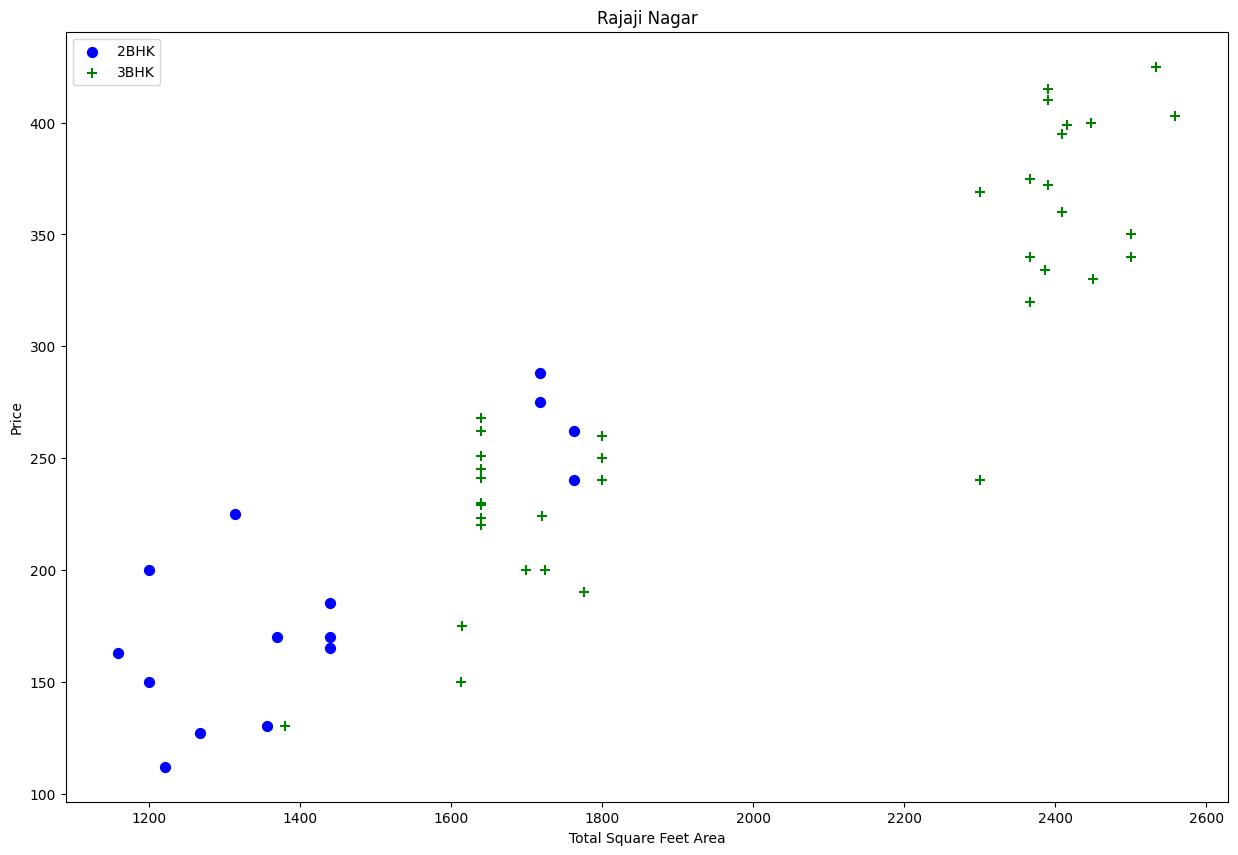

In [39]:
### checking area wise 2bhk and 3bhk price. If 2bhk_price>3bhk_price in same area/location is invalid
### checking pricing of 2bhk and 3bhk if same location by scatter plot & detect outlier(they are invalid)

def plot_scatter_chart(df,location):       ### location can be any area and df & location taking as parameter

    ###rows of location matches with respective 2 or 3 bhk
    bhk2 = df[(df.location==location)&(df.bhk==2)]
    bhk3 = df[(df.location==location)&(df.bhk==3)]

    ### using matplot library for scatterplot
    #plt.figure(figsize=(15,10))
    matplotlib.rcParams['figure.figsize'] = (15,10)

    ## drawing scatter plot for 2BHK
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2BHK',s=50)

    ## drawing scatter plot gor 3BHK
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3BHK',s=50)

    ## assgining axis wise name
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    plt.show()


### calling the function for 'Rajaji Nagar'
plot_scatter_chart(df3,'Rajaji Nagar')


Here,we get datapoint of 2bhk price is higher than 3bhk price which interprate as illogical price(or invalid pricing).It show that is outliers in dataset and need to remove as for same location 3bhk should not be cheaper than 2bhk price.

In [40]:

### to remove wrong/illogicaal price data

### for each location, we calculate statistics separatley for each BHK.
## Thses stats are stored in a Dictionary.like this 1bhk,2bhk....

### for understanding purpouse how to create dictionary for "BHK" statical .

{ '1':{
      'mean':4000,
      'std':2000,
      'count':34
},
'2':{
    'mean':4300,
    'std':2300,
    'count':22
}


}

{'1': {'mean': 4000, 'std': 2000, 'count': 34},
 '2': {'mean': 4300, 'std': 2300, 'count': 22}}

In [41]:
## define function to get cleaned dataframe
def remove_bhk_ouliers(df):
    ### storing unwanted rows that must be deleted later 
    exclude_indices = np.array([])     #empty array to store unwanted data

    ### loop through each location by grouping and works for each bhk
    for location,location_df in df3.groupby('location'):

        ### creating empty distionary to store statisticall data of each bhk of location.
        bhk_stats = {}     ### will store mean,std,count for each bhk

     ## calculate stats for each BHK
        for bhk,bhk_df in location_df.groupby('bhk'):     ## groups houses by bhk inside one location
            bhk_stats[bhk]={                               ### for each bhk like 1,2,3.....
                'mean': np.mean(bhk_df.price_per_sqft),   ## return average price per sqft
                'std': np.std(bhk_df.price_per_sqft),     ### return price variation
                'count': bhk_df.shape[0]                   ## no.of houses as avobe Dictionary shown
            }

        ## comapare higher BHK with lower BHK
        for bhk,bhk_df in location_df.groupby('bhk'):   ## again looping through BHK's to find outliers
            stats = bhk_stats.get(bhk-1)       ## gets previous->For 2BHK compare with 1 BHK

            ## Condition check
            if stats and stats['count']>5:    ## minimum 5 sample needed

                ### find wrong price entries
                bhk_df[bhk_df.price_per_sqft<stats['mean']]  ### select houses where like 2BHK price_per_sqft higher than 3BHK price_per_sqft

    ## as we created empty 'exclude_indices' to store indexes of bad rows by appending in it
                exclude_indices = np.append(
                    exclude_indices,
                    bhk_df[bhk_df.price_per_sqft<stats['mean']].index.values)

        ## remove all outliers
    return df3.drop(exclude_indices,axis='index') ## drops all collected invalid rows & return cleaned datasets



In [42]:
df4 = remove_bhk_ouliers(df3)

df4.shape

(7376, 7)

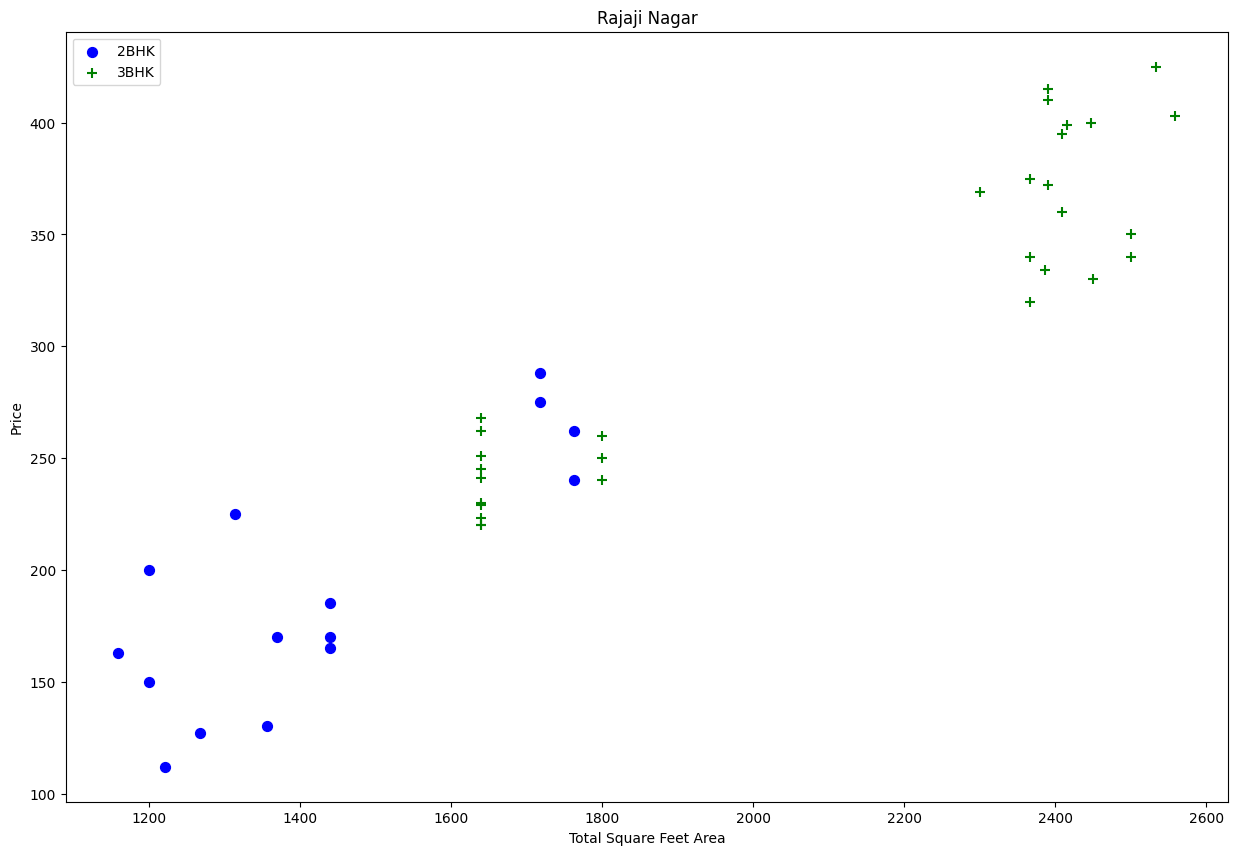

In [43]:
#### checking improvement after removing outliers in scatter plot.

plot_scatter_chart(df4,'Rajaji Nagar')

here, we notice that those 2bhk price datapoint higher than 3bhk price at point of around 1800 total_sqare feet area in before outlier removing scatter plot  are gone after removing outliers.

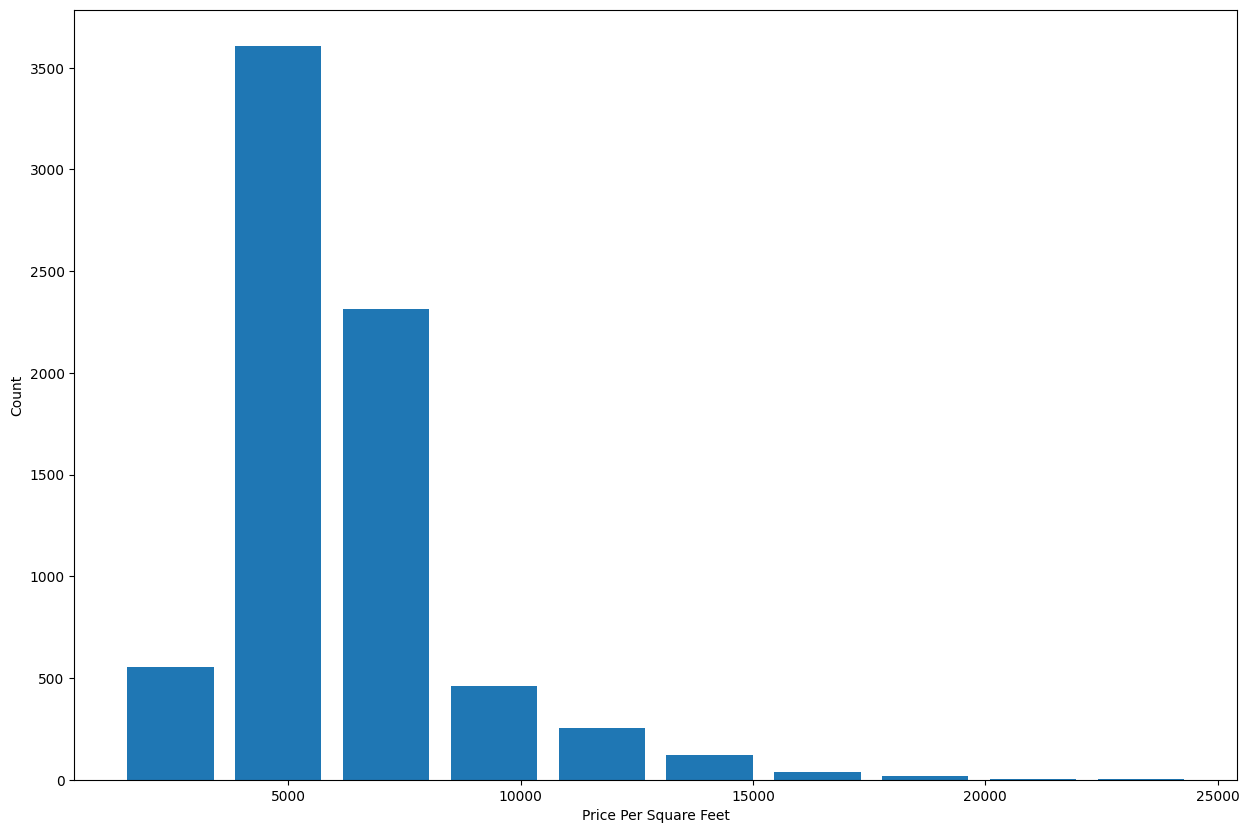

In [44]:
### To check how many properties or apartments in  per total_square_feet area by histgram

plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()

This graph shows that from 0 to 10000 price per square feet having majority of datapoints.

In [45]:
###nlets explore bathroom feature

df4["bath"].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

here,we got homes having bathroom greater than 10.let's extract those and see their total_sqft area

In [46]:
df4[df4["bath"]>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5312,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8536,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8625,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9358,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9689,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


here, We see for large spacious area like 12000 sqft having 12 might be ok but if 2bhk apartment have bathroom greater than 10 is quite unsual things.so lets check outliers in bathroom feature.


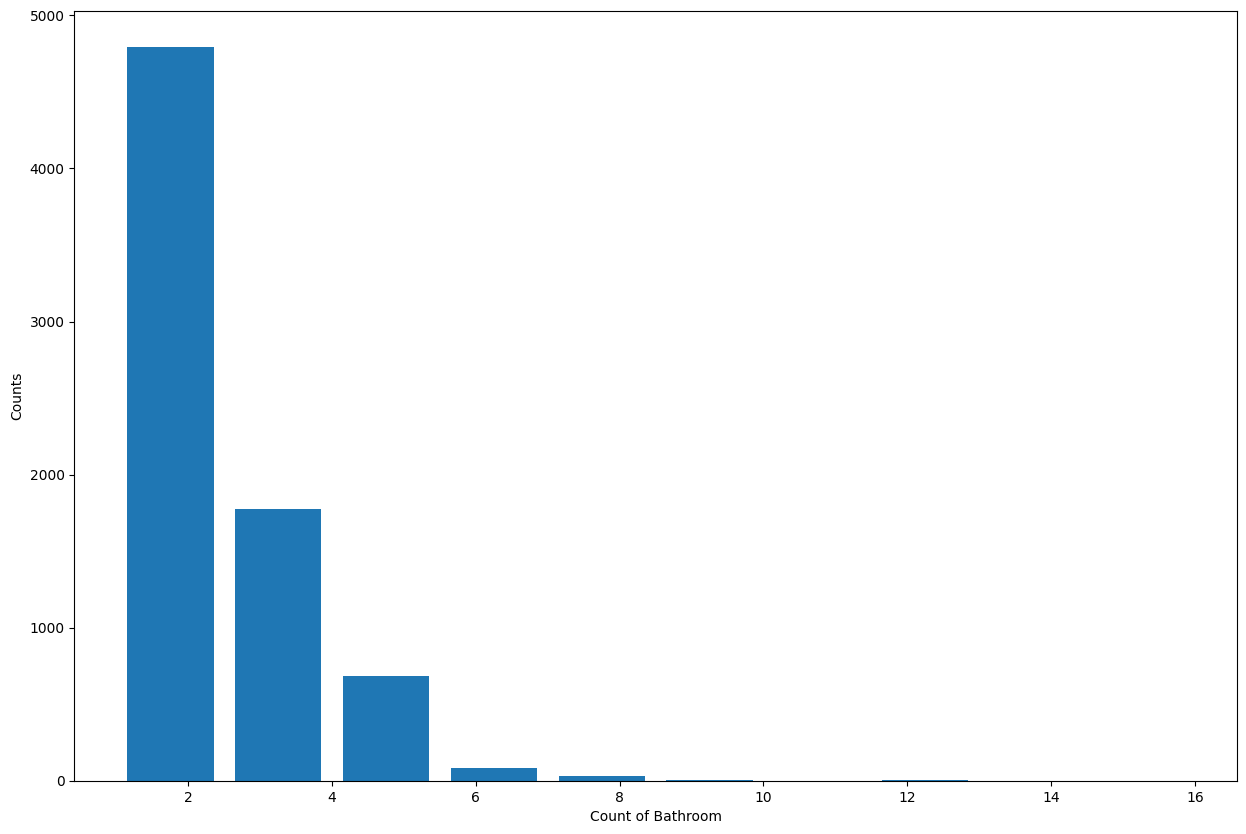

In [47]:
### checking count of bathroom having in datasets by histogram

plt.hist(df4["bath"],rwidth=0.8)
plt.xlabel("Count of Bathroom")
plt.ylabel("Counts")
plt.show()


here, we see that 2 to 6 (no.of bathrooms) having majority, but more than 8 bathroom for 2 or 3bhk room is can be unsual amd consider as outliers in bathroom.

let's consider that bathroom greater than no.of bedroom + 2 is as outliers like if 2bhk has 2 bedroom and bathroom is 4(2bdroom+2) than it's outlier.

In [48]:
### checking outlier present in property

df4[df4["bath"]>df4.bhk+2]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5273,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6756,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8461,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


This show that 4 Bedroom apartemnt(property) has 7 bathoom likewise 3bhk has 6 bathroom. so, considering as outliers we need to remove it.

In [49]:
## removing outliers present in bathroom feature

df5 = df4[df4["bath"]<df4.bhk+2]
df5
df5.shape

(7297, 7)

##### now, making final dataframe by removing some columns like price_per_sqft which is made for outlier detection and Size column is converted into bhk so, let drop this two columns and remains with others for final dataframe to use in Model building.

In [50]:
#### removing some feature from final dataframe

df6 = df5.drop(["size","price_per_sqft"],axis=1)
df6.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


For model building, convert categorical columns into numerical columns by One Hot Encoding.

In [51]:
## using get_dummies () function from OHE
dummies = pd.get_dummies(df6.location,dtype=int)
dummies.head(4)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We know that, avoid dummy variable trap ,typically we drop first columns then we get less columns.so,we are dropping last column that is "other" named feature to get maximum usefull data to train.

In [52]:
### creating new dataframe to append this dummies in it by concatination

df7 = pd.concat([df6,dummies.drop('other',axis=1)],axis=1)
df7.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### All location columns are dummy encoded , so drop categorical location feature which not needed futher.

In [53]:
## drop location

df8 = df7.drop(['location'],axis=1)
df8.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df8.shape   ### after encoding & concat. you can see shape difference in dataframe columns but row reamin same.

(7297, 245)

Splitting Data for Training & Testing data with X(indepedent variable) and Y(depedent variable/target variable)

In [55]:
### drop price for x 

x = df8.drop(["price"],axis=1)
x.head()



,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
## and put in y
y = df8["price"]
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [57]:
### import model for train_test_split form sklearn

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=10)   #20% for test and 80% for training

In [58]:
### fitting split data into LineaR Regression Model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Model is fitted, now evaluate model to check hoe good is model perfoming.

In [59]:
### model evaluation

lr.score(x_test,y_test)

0.7938089591502655

### lets evaluate model with other model algorithm

In [60]:
### model evaluation using K-Fold Cross- Validation 

## import k-fold model

from sklearn.model_selection import ShuffleSplit    ##(it have random shuffle to equal distribution)
from sklearn.model_selection import cross_val_score  ## evaluate matrix

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state= 10 )    ## splitting data



In [61]:

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.79380896, 0.88616743, 0.78613253, 0.8550106 , 0.88059606])

##### using 5-fold cross-validation, the Linear Regression Model achieved R^2 Score of around ~85%, indicating good predictive performance with consistent results across folds.

#### other than Linear Regression algorithm, trying model perfomance with Lasso & Decision Tree Regressor.

In [62]:
### Let's Evaluate Model with other Regression Algorithm through Grid Search CV
## import Grid Search CV
from sklearn.model_selection import GridSearchCV

## import Lasso and Decision Tree Regressor algorithm
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

In [63]:
### let define function to get best model using GridSearchCV

def find_best_model_using_Gridsearchcv(x,y):
    models = {
          'Linear_Regression':{
              'pipeline': Pipeline([
                  ('scaler', StandardScaler()),
                  ('model', LinearRegression())
              ]),
              'params': {'model__fit_intercept': [True, False]}
          },

          'Lasso' : {
               'pipeline': Pipeline([
                  ('scaler', StandardScaler()),
                  ('model', Lasso())
               ]),
              'params': {'model__alpha':[1,2],
                         'model__selection': ['random','cyclic']}
          },

          'Decision Tree': {
               'pipeline': Pipeline([
                  ('model', DecisionTreeRegressor())
               ]),
              'params': {
                  'model__criterion': ['mse','friedman_mse'],
                  'model__splitter' : ['best','random']
              }
              
          }

    }

    scores = []
    
    cv = ShuffleSplit(n_splits= 5, test_size=0.2, random_state= 10)


    for models_name, config in models.items():
        gs = GridSearchCV(config['pipeline'], config['params'], cv=cv)
        gs.fit(x,y)
        scores.append( {
                'model': models_name,
                'best_score': gs.best_score_,
                'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model','best_score','best_params'])
    

In [64]:
### importing warning to ingore as gridsearchcv get all possiablity combination get failed,so might be chances warning shows
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings('ignore',category=FitFailedWarning)

### final score result of 3-models 
find_best_model_using_Gridsearchcv(x,y)


C:\Users\Kiran\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:1137: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.72601782 0.65436259]
  warnings.warn(


,model,best_score,best_params
0,Linear_Regression,0.840343,{'model__fit_intercept': True}
1,Lasso,0.813698,"{'model__alpha': 1, 'model__selection': 'random'}"
2,Decision Tree,0.726018,"{'model__criterion': 'friedman_mse', 'model__s..."


* Linear Regression achieved the highest cross-validation R^2 Score (0.840343), indicating it explains approx.84% of the varience in house prices.
* Lasso performed slightly lower (0.813703), suggesting that regularization reduced model complexity at the cost of some predictive power.
* Decision Tree showed the lowest performance (0.726997), indicating that the data did not strongly benefit from non-linear splits.

**Therefore, Linear Regression is selected as the "Best Model".**

#### Property Price Prediction using couple of Sample Data

In [65]:
### let take lr classifier to predict sample data by using predict price function

def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]

    p = np.zeros(len(x.columns))
    p[0] = sqft
    p[1] = bath
    p[2] = bhk

    if loc_index>=0:
        p[loc_index] = 1

    return lr.predict([p])[0]

In [66]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [67]:
## check price prediction for giving location = 1st Phase JP Nagar

print(predict_price('1st Phase JP Nagar',1000,2,2)) ## for 2-bathroom and 2-bhk

84.88170139812843


C:\Users\Kiran\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [68]:
print(predict_price('1st Phase JP Nagar',1000,3,3)) ## for 3-bathroom and 3-bhk

89.52587028773323


C:\Users\Kiran\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [69]:
print(predict_price('1st Phase JP Nagar',1000,2,3)) ## for 2-bathroom and 3-bhk

83.66965335031387


C:\Users\Kiran\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Both area price prediction:- for 2bhk & 2 bath is 84.88 lakh & for 3bhk & 3 bath is 89.52 lakh 
showing difference as room get increases that means model predicting well.

In [70]:
#### taking Indira Nagar as premium area checking price prediction

print(predict_price('Indira Nagar',1000,2,2)) ## for 2-bathroom and 2-bhk

179.99514865021914


C:\Users\Kiran\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [71]:
print(predict_price('Indira Nagar',1000,3,3)) ## for 3-bathroom and 3-bhk

184.63931753982394


C:\Users\Kiran\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [72]:
print(predict_price('Indira Nagar',1000,2,3)) ## for 2-bathroom and 3-bhk

178.78310060240457


C:\Users\Kiran\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


NOTE:- for same bathroom and bhk but different area of location havign price difference as 1st Phase JP Nagar's price in lakhs and Indira Nagar's in corar.

##### Model Deployment

In [73]:
#### Exporting Model in Pickel file

import pickle

with open ("Bangaluru_house _price_pred.pickle",'wb') as f:
    pickle.dump(lr,f)

In [74]:
#### Exporting Model's column_names(x.columns) information into JSON file 

import json

columns = {
    'data_columns' : [ col.lower() for col in x.columns]
}

with open ("columns.json","w") as f:
    f.write(json.dumps(columns))